In [125]:
import bs4
import requests
import lxml
import re
import pandas
import matplotlib.pyplot as plt


In [368]:
import datetime
import numpy

In [297]:
res = requests.get("https://www.anbima.com.br/informacoes/est-termo/CZ.asp")
soup = bs4.BeautifulSoup(res.text,'lxml')

c:\Users\felip\anaconda3\Lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [ ]:
print(soup)

In [154]:
data = {
    "vértices":[],
    "ETTJ IPCA":[],
    "ETTJ PRE":[],
    "Inflação Implícita":[],
}

In [155]:
def adidata(resultado):
    if len(resultado) == 4:
        data['vértices'].append(int(resultado[0].replace('.',"")))
        data['ETTJ IPCA'].append(float(resultado[1].replace(',','.')))
        data['ETTJ PRE'].append(float(resultado[2].replace(',','.')))
        data['Inflação Implícita'].append(float(resultado[3].replace(',','.')))
    elif len(resultado) == 2:
        data['vértices'].append(int(resultado[0].replace('.',"")))
        data['ETTJ IPCA'].append(float(resultado[1].replace(',',".")))
        data['ETTJ PRE'].append(None)
        data['Inflação Implícita'].append(None)

In [332]:
a = re.findall(r'\d+.\d+',soup.select('table')[5].select('tr')[2].text)
print(a)

['126', '7,4272', '10,1929', '2,5744']


In [ ]:
re.match(r'\d\d\d', "")

In [333]:
soup.select('table')[5].select('tr')[0].text

'\nETTJ / Inflação Implicita (IPCA) (%a.a./252)\n'

In [156]:
for item in soup.select('table')[5].select('tr'):
   resultado = re.findall(r'(?<!/)\d\d\d|(?<!/)\d+,\d+|(?<!/)\d+.\d+', item.text)
   adidata(resultado)

In [363]:
df = pandas.DataFrame(data)

In [388]:
df[df['ETTJ PRE'].notna()]['ETTJ PRE'].max()

11.8767

In [170]:
df[df.index == 504]['ETTJ PRE'].values[0]

10.7115

<Axes: xlabel='vértices'>

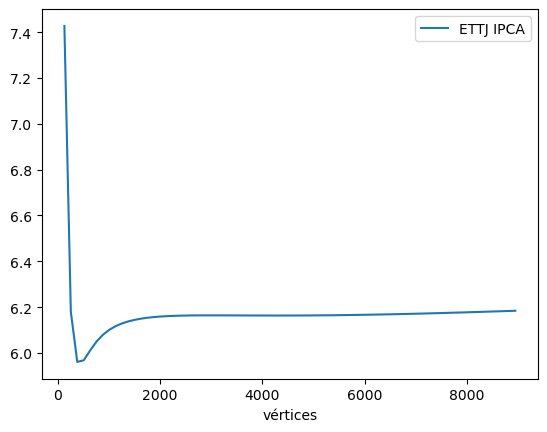

In [401]:
df.plot.line(x='vértices', y=['ETTJ IPCA'])

array([<Axes: xlabel='vértices'>, <Axes: xlabel='vértices'>,
       <Axes: xlabel='vértices'>], dtype=object)

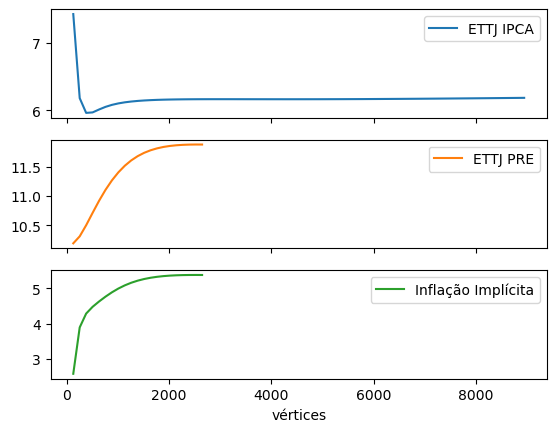

In [406]:
df.plot.line(x='vértices', subplots=True)

<Axes: >

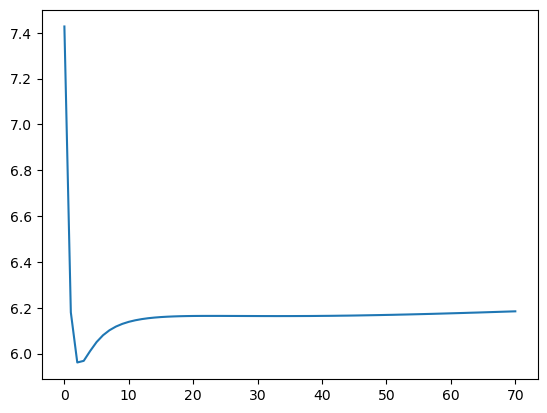

In [408]:
df['ETTJ IPCA'].plot(x='vértices')

In [517]:
du = 200

In [509]:
lista = df['vértices'].to_list()

In [445]:
def diferenca(y):
    z = abs(du-y)
    return (z,y)

In [513]:
indice = df[df['vértices'] == min(map(diferenca,lista))[1]].index.to_list()
indice = indice[0]

In [514]:
tx_1 = []
tx_2 = []

In [515]:
tx_1.append(df[df.index == indice]['vértices'].values[0])
tx_1.append(df[df.index == indice]['ETTJ PRE'].values[0])
tx_2.append(df[df.index == indice+1]['vértices'].values[0])
tx_2.append(df[df.index == indice+1]['ETTJ PRE'].values[0])

In [516]:
tx_interpolada_linear = tx_1[1] + (du-tx_1[0])*(tx_2[1]-tx_1[1])/(tx_2[0]-tx_1[0])

CALCULAR UM TÍTULO BULLET CUPOM ZERO
considerar d.u como dados e verdadeiros

1. adicionar no data frame os vertices 21,42,63
2. puxar as taxas mais próximas do d.u
3. interpolar a taxa
4. da o P do título

5. calcular os d.u entre duas datas
6. como considerar feriados

ideia:
data1 = datetime.today()
data2 = data do vencimento

dif = data2 - data1
dif_em_anos = dif.day()/365
dif_em_du = dif_em_anos*252

n_feriados = df_feriados[data1 <df_feriados> data2]

d.u = dif_em_du - n_feriados


In [367]:
datetime.datetime(2024,5,11).weekday()

5

In [372]:
data1 = datetime.date(2024,3,20)
data2 = datetime.date(datas[2], datas[1],datas[0])
n = numpy.busday_count(data1, data2)

In [386]:
datas = re.findall(r'\d+','11 03 24') -> 11 3 2024

In [387]:
if data[1] == '0\d':
    data[1].replace(0,"")

['11', '03', '24']

In [ ]:
df_feriados = pandas.read_excel("anbimaferiados")